# BƯỚC 1: Tải dữ liệu

* * *

In [ ]:
import numpy as np
import pandas as pd

from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/MyDrive/Colab Notebooks/DataScience/preprocessing

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/Colab Notebooks/DataScience/preprocessing


In [ ]:
df = pd.read_csv("achive.csv")
df[26:36]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
26,LP001068,Male,Yes,0,Graduate,No,2799,2253.0,122.0,360.0,1.0,Semiurban,Y
27,LP001073,Male,Yes,2,Not Graduate,No,4226,1040.0,110.0,360.0,1.0,Urban,Y
28,LP001086,Male,No,0,Not Graduate,No,1442,0.0,35.0,360.0,1.0,Urban,N
29,LP001087,Female,No,2,Graduate,NaN,3750,2083.0,120.0,360.0,1.0,Semiurban,Y
30,LP001091,Male,Yes,1,Graduate,NaN,4166,3369.0,201.0,360.0,NaN,Urban,N
31,LP001095,Male,No,0,Graduate,No,3167,0.0,74.0,360.0,1.0,Urban,N
32,LP001097,Male,No,1,Graduate,Yes,4692,0.0,106.0,360.0,1.0,Rural,N
33,LP001098,Male,Yes,0,Graduate,No,3500,1667.0,114.0,360.0,1.0,Semiurban,Y
34,LP001100,Male,No,3+,Graduate,No,12500,3000.0,320.0,360.0,1.0,Rural,N
35,LP001106,Male,Yes,0,Graduate,No,2275,2067.0,NaN,360.0,1.0,Urban,Y


Đây là bộ dữ liệu Loan Approval dùng để dự đoán hồ sơ vay có được phê duyệt hay không.
Đầu tiên ta quan sát thấy tập dữ liệu có nhiều Missing Value, và có những cột có dữ liệu chưa được chuẩn hóa, ví dụ Dependents (dữ liệu lẫn 0, 1, 2 và 3+)

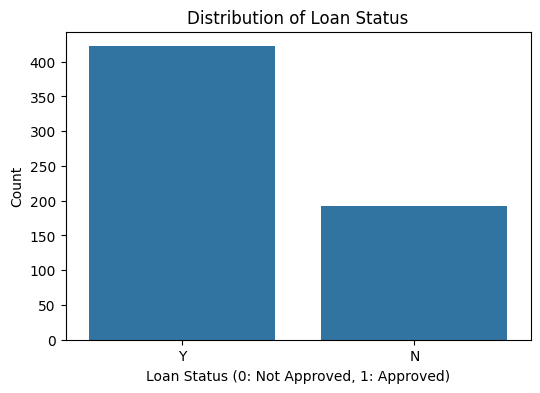

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6, 4))
sns.countplot(x='Loan_Status', data=df)
plt.title('Distribution of Loan Status')
plt.xlabel('Loan Status (0: Not Approved, 1: Approved)')
plt.ylabel('Count')
plt.show()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


Dataset được cung cấp có nhiều cột có kiểu dữ liệu Object, điều đó khá khó xử lý đối với các mô hình ML, DL, vì vậy cũng cần được xử lý

In [ ]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [ ]:
# Explore categorical data

categorical_columns = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed']

for col in categorical_columns:
    print(f"\nColumn '{col}':")

    # Unique values
    unique_values = df[col].unique()
    print(f"  Unique values: {unique_values}")
    print(f"  Number of unique values: {len(unique_values)}")

    # Value counts and percentages
    print(" Distribution:")
    value_counts = df[col].value_counts()
    for value, count in value_counts.items():
        percentage = (count / len(df)) * 100
        print(f"    • {value}: {count} ({percentage:.1f}%)")


Column 'Gender':
  Unique values: ['Male' 'Female' nan]
  Number of unique values: 3
 Distribution:
    • Male: 489 (79.6%)
    • Female: 112 (18.2%)

Column 'Married':
  Unique values: ['No' 'Yes' nan]
  Number of unique values: 3
 Distribution:
    • Yes: 398 (64.8%)
    • No: 213 (34.7%)

Column 'Dependents':
  Unique values: ['0' '1' '2' '3+' nan]
  Number of unique values: 5
 Distribution:
    • 0: 345 (56.2%)
    • 1: 102 (16.6%)
    • 2: 101 (16.4%)
    • 3+: 51 (8.3%)

Column 'Education':
  Unique values: ['Graduate' 'Not Graduate']
  Number of unique values: 2
 Distribution:
    • Graduate: 480 (78.2%)
    • Not Graduate: 134 (21.8%)

Column 'Self_Employed':
  Unique values: ['No' 'Yes' nan]
  Number of unique values: 3
 Distribution:
    • No: 500 (81.4%)
    • Yes: 82 (13.4%)


# BƯỚC 2: Làm sạch dữ liệu

Phần này tập trung vào việc xử lý các giá trị thiếu và loại bỏ các hàng trùng lặp trong tập dữ liệu.

## Xử lý giá trị thiếu

Các giá trị thiếu trong cột số được điền bằng giá trị trung bình, trong khi các giá trị thiếu trong cột phân loại được điền bằng giá trị mode.

In [ ]:
# Check for missing values
print(df.isnull().sum())

# Fill missing values in numerical columns with the mean
numerical_cols = df.select_dtypes(include=np.number).columns
for col in numerical_cols:
    df[col].fillna(df[col].mean(), inplace=True)

# Fill missing values in categorical columns with the mode
categorical_cols = df.select_dtypes(include='object').columns
for col in categorical_cols:
    df[col].fillna(df[col].mode()[0], inplace=True)

print("\nMissing values after filling:")
print(df.isnull().sum())


Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

Missing values after filling:
Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64


/tmp/ipython-input-1878815428.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mean(), inplace=True)
/tmp/ipython-input-1878815428.py:12: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using

## Xóa các hàng trùng lặp

Bước này loại bỏ bất kỳ hàng trùng lặp nào khỏi tập dữ liệu để đảm bảo tính toàn vẹn của dữ liệu.

In [ ]:
before = len(df)
df = df.drop_duplicates()
after = len(df)
print(f"Removed {before - after} duplicate rows.\n")

Removed 0 duplicate rows.



# BƯỚC 3: Trực quan hóa (Visualization)


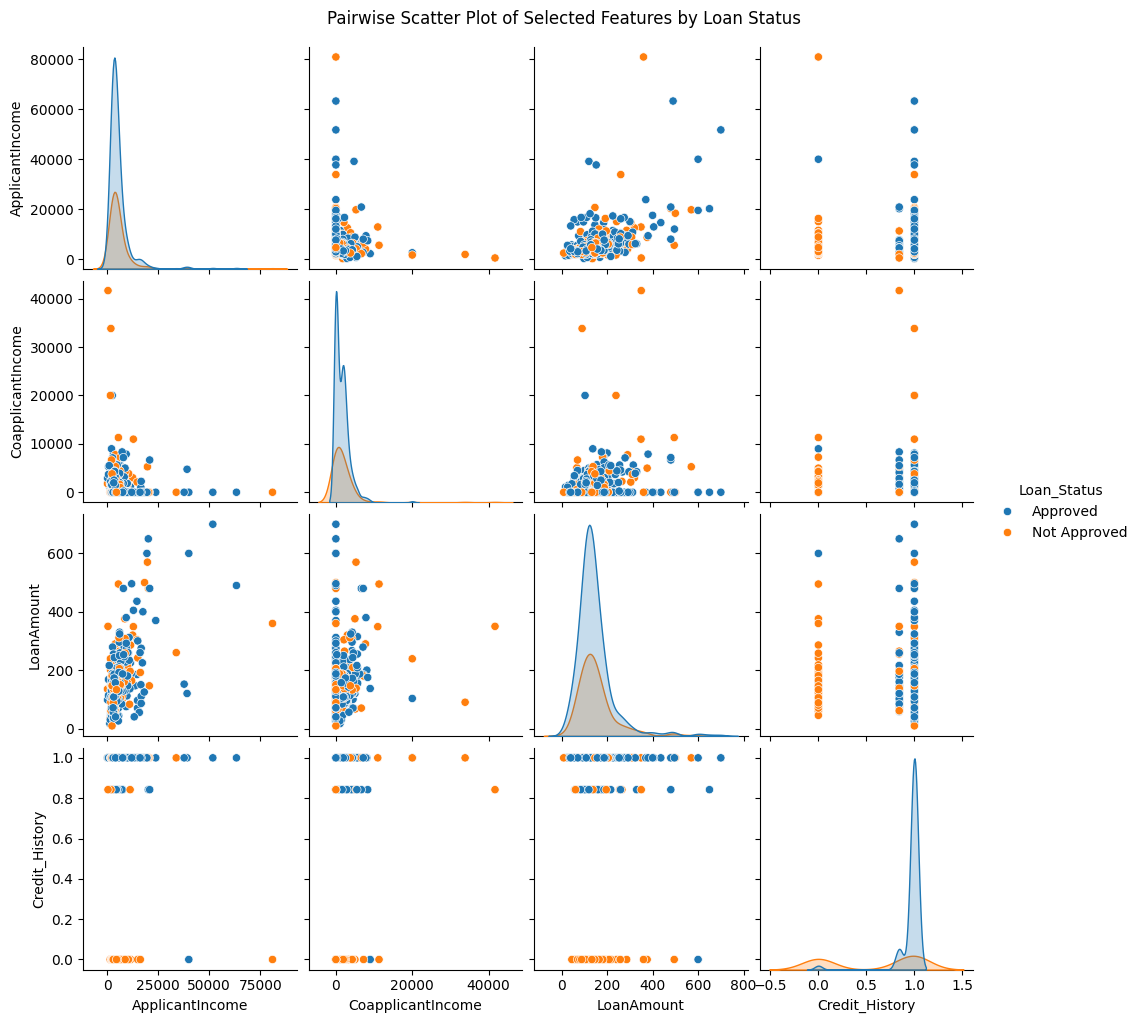

In [ ]:
import seaborn as sns

columns_to_plot = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Credit_History', 'Loan_Status']
df_subset = df[columns_to_plot].copy()
df_subset['Loan_Status'] = df_subset['Loan_Status'].map({0: 'Not Approved', 1: 'Approved'})
numerical_cols_subset = [col for col in columns_to_plot if df_subset[col].dtype in ['int64', 'float64']]

sns.pairplot(df_subset, vars=numerical_cols_subset, hue='Loan_Status', diag_kind='kde')
plt.suptitle('Pairwise Scatter Plot of Selected Features by Loan Status', y=1.02)
plt.show()

# BƯỚC 4: Chuẩn bị dữ liệu cho mô hình

Phần này chuẩn bị dữ liệu cho các mô hình học máy bằng cách tách các đặc trưng và biến mục tiêu.

## Mã hóa nhãn (Label Encoding)

Sử dụng LabelEncoder để chuyển đổi các giá trị phân loại trong các cột đã chọn thành các giá trị số.

In [ ]:
from sklearn.preprocessing import LabelEncoder

print("\n1. LABEL ENDCODING COLUMN GENDER: ")
le_gender = LabelEncoder()
df['Gender'] = le_gender.fit_transform(df['Gender'])
print(f"   Classes learned: {le_gender.classes_}")
print(f"   Transformed values: {df['Gender'].unique()}")
print("\n2. LABEL ENDCODING COLUMN MARRIED: ")
le_married = LabelEncoder()
df['Married'] = le_married.fit_transform(df['Married'])
print(f"   Classes learned: {le_married.classes_}")
print(f"   Transformed values: {df['Married'].unique()}")

print("\n3. LABEL ENDCODING COLUMN DEPENDENTS: ")
# Replace '3+' with '3' before encoding
df['Dependents'] = df['Dependents'].replace('3+', '3')
le_dependents = LabelEncoder()
df['Dependents'] = le_dependents.fit_transform(df['Dependents'])
print(f"   Classes learned: {le_dependents.classes_}")
print(f"   Transformed values: {df['Dependents'].unique()}")

print("\n4. LABEL ENDCODING COLUMN EDUCATION: ")
le_education = LabelEncoder()
df['Education'] = le_education.fit_transform(df['Education'])
print(f"   Classes learned: {le_education.classes_}")
print(f"   Transformed values: {df['Education'].unique()}")

print("\n5. LABEL ENDCODING COLUMN SELF_EMPLOYED: ")
le_self_employed = LabelEncoder()
df['Self_Employed'] = le_self_employed.fit_transform(df['Self_Employed'])
print(f"   Classes learned: {le_self_employed.classes_}")
print(f"   Transformed values: {df['Self_Employed'].unique()}")

print("\n6. LABEL ENDCODING COLUMN PROPERTY_AREA: ")
le_property_area = LabelEncoder()
df['Property_Area'] = le_property_area.fit_transform(df['Property_Area'])
print(f"   Classes learned: {le_property_area.classes_}")
print(f"   Transformed values: {df['Property_Area'].unique()}")

print("\n7. LABEL ENDCODING COLUMN LOAN_STATUS: ")
le_loan_status = LabelEncoder()
df['Loan_Status'] = le_loan_status.fit_transform(df['Loan_Status'])
print(f"   Classes learned: {le_loan_status.classes_}")
print(f"   Transformed values: {df['Loan_Status'].unique()}")

# Display the first few rows of the transformed DataFrame
print("\nDataFrame after Label Encoding:")
display(df.head())


1. LABEL ENDCODING COLUMN GENDER: 
   Classes learned: ['Female' 'Male']
   Transformed values: [1 0]

2. LABEL ENDCODING COLUMN MARRIED: 
   Classes learned: ['No' 'Yes']
   Transformed values: [0 1]

3. LABEL ENDCODING COLUMN DEPENDENTS: 
   Classes learned: ['0' '1' '2' '3']
   Transformed values: [0 1 2 3]

4. LABEL ENDCODING COLUMN EDUCATION: 
   Classes learned: ['Graduate' 'Not Graduate']
   Transformed values: [0 1]

5. LABEL ENDCODING COLUMN SELF_EMPLOYED: 
   Classes learned: ['No' 'Yes']
   Transformed values: [0 1]

6. LABEL ENDCODING COLUMN PROPERTY_AREA: 
   Classes learned: ['Rural' 'Semiurban' 'Urban']
   Transformed values: [2 0 1]

7. LABEL ENDCODING COLUMN LOAN_STATUS: 
   Classes learned: ['N' 'Y']
   Transformed values: [1 0]

DataFrame after Label Encoding:


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1,0,0,0,0,5849,0.0,146.412162,360.0,1.0,2,1
1,LP001003,1,1,1,0,0,4583,1508.0,128.000000,360.0,1.0,0,0
2,LP001005,1,1,0,0,1,3000,0.0,66.000000,360.0,1.0,2,1
3,LP001006,1,1,0,1,0,2583,2358.0,120.000000,360.0,1.0,2,1
4,LP001008,1,0,0,0,0,6000,0.0,141.000000,360.0,1.0,2,1


## Tạo ma trận đặc trưng (X)

Chọn các cột đặc trưng và chuyển đổi chúng thành mảng NumPy.

In [58]:
# Create feature matrix X
# Select feature columns and convert to NumPy array
feature = df.columns.drop("Loan_ID", "Loan_Status")
X = df[feature].values

print(f"   Shape: {X.shape}")
print(f"   Data type: {X.dtype}")
print(f"   First 5 rows:")

for i in range(5):
    print(f"   Patient {i}: {X[i]}")

print('\n')
X[0:5]


   Shape: (614, 12)
   Data type: float64
   First 5 rows:
   Patient 0: [1.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 5.84900000e+03 0.00000000e+00 1.46412162e+02
 3.60000000e+02 1.00000000e+00 2.00000000e+00 1.00000000e+00]
   Patient 1: [1.000e+00 1.000e+00 1.000e+00 0.000e+00 0.000e+00 4.583e+03 1.508e+03
 1.280e+02 3.600e+02 1.000e+00 0.000e+00 0.000e+00]
   Patient 2: [1.0e+00 1.0e+00 0.0e+00 0.0e+00 1.0e+00 3.0e+03 0.0e+00 6.6e+01 3.6e+02
 1.0e+00 2.0e+00 1.0e+00]
   Patient 3: [1.000e+00 1.000e+00 0.000e+00 1.000e+00 0.000e+00 2.583e+03 2.358e+03
 1.200e+02 3.600e+02 1.000e+00 2.000e+00 1.000e+00]
   Patient 4: [1.00e+00 0.00e+00 0.00e+00 0.00e+00 0.00e+00 6.00e+03 0.00e+00 1.41e+02
 3.60e+02 1.00e+00 2.00e+00 1.00e+00]




array([[1.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 5.84900000e+03, 0.00000000e+00, 1.46412162e+02,
        3.60000000e+02, 1.00000000e+00, 2.00000000e+00, 1.00000000e+00],
       [1.00000000e+00, 1.00000000e+00, 1.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 4.58300000e+03, 1.50800000e+03, 1.28000000e+02,
        3.60000000e+02, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.00000000e+00, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        1.00000000e+00, 3.00000000e+03, 0.00000000e+00, 6.60000000e+01,
        3.60000000e+02, 1.00000000e+00, 2.00000000e+00, 1.00000000e+00],
       [1.00000000e+00, 1.00000000e+00, 0.00000000e+00, 1.00000000e+00,
        0.00000000e+00, 2.58300000e+03, 2.35800000e+03, 1.20000000e+02,
        3.60000000e+02, 1.00000000e+00, 2.00000000e+00, 1.00000000e+00],
       [1.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 6.00000000e+03, 0.00000000e+00, 1.41

## Tạo biến mục tiêu (y)

Trích xuất biến mục tiêu ('Loan_Status') và chuyển đổi nó thành mảng NumPy.

In [ ]:
y = df['Loan_Status'].values
y[:5]

array([1, 0, 1, 1, 1])

##  Chuẩn hóa dữ liệu  (Feature Scaling)


In [59]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_scaled = scaler.fit_transform(X)

print("\nShape of X after Feature Scaling:", X_scaled.shape)
print("\nFirst 5 rows of X after Feature Scaling:")
print(X_scaled[:5])


Shape of X after Feature Scaling: (614, 12)

First 5 rows of X after Feature Scaling:
[[ 0.47234264 -1.37208932 -0.73780632 -0.52836225 -0.39260074  0.07299082
  -0.55448733  0.          0.27985054  0.45164045  1.22329839  0.67451931]
 [ 0.47234264  0.72881553  0.25346957 -0.52836225 -0.39260074 -0.13441195
  -0.03873155 -0.21927331  0.27985054  0.45164045 -1.31851281 -1.48253724]
 [ 0.47234264  0.72881553 -0.73780632 -0.52836225  2.54711697 -0.39374734
  -0.55448733 -0.957641    0.27985054  0.45164045  1.22329839  0.67451931]
 [ 0.47234264  0.72881553 -0.73780632  1.89264089 -0.39260074 -0.46206247
   0.2519796  -0.31454656  0.27985054  0.45164045  1.22329839  0.67451931]
 [ 0.47234264 -1.37208932 -0.73780632 -0.52836225 -0.39260074  0.09772844
  -0.55448733 -0.06445428  0.27985054  0.45164045  1.22329839  0.67451931]]
